# Import Libraries 

In [1]:
import datetime
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
import datetime
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

## Defining Variables Needed For Data Quality Checks

In [2]:
#Current Data Checks for ME

# - Difference in sum of cases by race v. Total cases (should be equal)

# - Difference in sum of cases by ethnicity v. Total cases (should be equal)

# - Difference in sum of deaths by race versus Total deaths (Within 5 values)

# - Difference in sum of deaths by ethnicity v. Total deaths (Within 5 values)



#These Data Checks are also included for ME, however in the Public CRDT hospital data is not listed.
#Now added will add data checks later!

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible

# - Difference in sum of hopsital by hospital by race versus Total hospital might not be avaible


#Variables needed
# 1) Sum of cases by Race
# 2) Sum of Cases by ethnicity
# 3) Sum of Deaths by Race
# 4) Sum of Deaths by Ethnicity
# 4) Total Cases
# 5) Total Deaths

# Creating a Conversion Function

In [3]:
def NewestTotal_Converter(df, col_name):
    df_result = df[col_name].iloc[0:1].value[0]
    return df_result

## Downloading the Public CSV from CRDT

In [13]:
public_csv = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS8SzaERcKJOD_EzrtCDK1dX1zkoMochlA9iHoHg_RSw3V8bkpfk1mpw4pfL5RdtSOyx_oScsUtyXyk/pub?gid=43720681&single=true&output=csv")

## Defining Maine Covid Summary from the Public CSV

In [15]:
maine_covid_summary = public_csv[public_csv['State']== 'ME']

maine_covid_summary

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_LatinX,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
23,20201216,ME,17311,13427,1397.0,NaN,238.0,52.0,10.0,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,20201213,ME,15923,12356,1342.0,NaN,228.0,49.0,10.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,20201209,ME,14454,11266,1266.0,NaN,209.0,47.0,8.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,20201206,ME,13348,10371,1218.0,NaN,202.0,46.0,6.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,20201202,ME,12208,9450,1170.0,NaN,193.0,42.0,6.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,20200426,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3831,20200422,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3887,20200419,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3943,20200415,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating Total Cases,  Total Cases by Race and Total Cases by Ethnicity variables

In [19]:
##Add .values[0] to everything to convert



#Most recent Total Cases Reported in Maine
total_cases = maine_covid_summary['Cases_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_cases = total_cases.astype(float)

print("Total Cases in Maine as of Today")
print(total_cases)


#Need to find case totals for each race (including other and unknown)

cases_white = maine_covid_summary['Cases_White'].iloc[0:1]
cases_white = cases_white.astype(float)

cases_black = maine_covid_summary['Cases_Black'].iloc[0:1]
cases_black = cases_black.astype(float)

cases_asian = maine_covid_summary['Cases_Asian'].iloc[0:1]
cases_asian = cases_asian.astype(float)

cases_aian = maine_covid_summary['Cases_AIAN'].iloc[0:1]
cases_aian = cases_aian.astype(float)

cases_NHPI = maine_covid_summary['Cases_NHPI'].iloc[0:1]
cases_NHPI = cases_NHPI.astype(float)

cases_multi = maine_covid_summary['Cases_Multiracial'].iloc[0:1]
cases_multi = cases_multi.astype(float)

cases_other = maine_covid_summary['Cases_Other'].iloc[0:1]
cases_other = cases_other.astype(float)

cases_unknown = maine_covid_summary['Cases_Unknown'].iloc[0:1]
cases_unknown = cases_unknown.astype(float)


total_cases_race = cases_white + cases_black + cases_asian + cases_aian + cases_NHPI + cases_multi + cases_other + cases_unknown
print("Total Cases with Race in Maine")
print(total_cases_race)

#Need to find case totals for each ethnicity (including other and unknown)

cases_ethnicity_hispanic = maine_covid_summary['Cases_Ethnicity_Hispanic'].iloc[0:1]
cases_ethnicity_hispanic = cases_ethnicity_hispanic.astype(float)

cases_ethnicity_nonhispanic = maine_covid_summary['Cases_Ethnicity_NonHispanic'].iloc[0:1]
cases_ethnicity_nonhispanic = cases_ethnicity_nonhispanic.astype(float)

cases_ethnicity_unknown = maine_covid_summary['Cases_Ethnicity_Unknown'].iloc[0:1]
cases_ethnicity_unknown = cases_ethnicity_unknown.astype(float)
#cases_ethnicity_unknown = NewestTotal_Converter(maine_covid_summary, 'Cases_Ethnicity_Unknown')
#cases_ethnicity_unknown

total_cases_ethnicity = cases_ethnicity_hispanic + cases_ethnicity_nonhispanic + cases_ethnicity_unknown
print("Total Cases with Ehtnicity in Maine")
print(total_cases_ethnicity)


Total Cases in Maine as of Today
23    17311.0
Name: Cases_Total, dtype: float64
Total Cases with Race in Maine
23    17311.0
dtype: float64
Total Cases with Ehtnicity in Maine
23    17311.0
dtype: float64


## Creating Total Deaths,  Total Deaths by Race and Total Deaths by Ethnicity variables

In [20]:
#Most recent Total Cases Reported in Maine
total_deaths = maine_covid_summary['Deaths_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_deaths = total_deaths.astype(float)

#Printing out Total Deaths
print("Total Deaths in Maine as of Today")
print(total_deaths)


#Need to find death totals for each race (including other and unknown)

deaths_white = maine_covid_summary['Deaths_White'].iloc[0:1]
deaths_white = deaths_white.astype(float)

deaths_black = maine_covid_summary['Deaths_Black'].iloc[0:1]
deaths_black = deaths_black.astype(float)

deaths_asian = maine_covid_summary['Deaths_Asian'].iloc[0:1]
deaths_asian = deaths_asian.astype(float)

deaths_aian = maine_covid_summary['Deaths_AIAN'].iloc[0:1]
deaths_aian = deaths_aian.astype(float)

deaths_NHPI = maine_covid_summary['Deaths_NHPI'].iloc[0:1]
deaths_NHPI = deaths_NHPI.astype(float)

deaths_multi = maine_covid_summary['Deaths_Multiracial'].iloc[0:1]
deaths_multi = deaths_multi.astype(float)

deaths_other = maine_covid_summary['Deaths_Other'].iloc[0:1]
deaths_other = deaths_other.astype(float)

deaths_unknown = maine_covid_summary['Deaths_Unknown'].iloc[0:1]
deaths_unknown = deaths_unknown.astype(float)


total_deaths_race = deaths_white + deaths_black + deaths_asian + deaths_aian + deaths_NHPI + deaths_multi + deaths_other + deaths_unknown

print("Total Deaths with Race in Maine")
print(total_deaths_race)


#Need to find death totals for each ethnicity (including other and unknown)

deaths_ethnicity_hispanic = maine_covid_summary['Deaths_Ethnicity_Hispanic'].iloc[0:1].values[0]
deaths_ethnicity_hispanic = deaths_ethnicity_hispanic.astype(float)

deaths_ethnicity_nonhispanic = maine_covid_summary['Deaths_Ethnicity_NonHispanic'].iloc[0:1].values[0]
deaths_ethnicity_nonhispanic = deaths_ethnicity_nonhispanic.astype(float)

deaths_ethnicity_unknown = maine_covid_summary['Deaths_Ethnicity_Unknown'].iloc[0:1].values[0]
deaths_ethnicity_unknown = deaths_ethnicity_unknown.astype(float)

total_deaths_ethnicity = deaths_ethnicity_hispanic + deaths_ethnicity_nonhispanic + deaths_ethnicity_unknown


print("Total Deaths with Ethnicity in Maine")
print(total_deaths_ethnicity)

Total Deaths in Maine as of Today
23    267.0
Name: Deaths_Total, dtype: float64
Total Deaths with Race in Maine
23    267.0
dtype: float64
Total Deaths with Ethnicity in Maine
267.0


## Creating Total Deaths,  Total Deaths by Race and Total Deaths by Ethnicity variables

In [49]:
#Most recent Total Cases Reported in Maine
total_hosp = maine_covid_summary['Hosp_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
#total_hosp = total_hosp.astype(float)

#Printing out Total Hospitalizations
print("Total Hospitalizations in Massachusetts as of Today")
print(total_hosp)


#Need to find Hospitalizations totals for each race (including other and unknown)

hosp_white = maine_covid_summary['Hosp_White'].iloc[0:1]
hosp_white = hosp_white.astype(float)


hosp_black = maine_covid_summary['Hosp_Black'].iloc[0:1]
hosp_black = hosp_black.astype(float)


hosp_latinx = maine_covid_summary['Hosp_LatinX'].iloc[0:1]
hosp_latinx = hosp_latinx.astype(float)


hosp_asian = maine_covid_summary['Hosp_Asian'].iloc[0:1]
hosp_asian = hosp_asian.astype(float)

hosp_aian = maine_covid_summary['Deaths_AIAN'].iloc[0:1]
hosp_aian = hosp_aian.astype(float)

hosp_NHPI = maine_covid_summary['Deaths_NHPI'].iloc[0:1]
hosp_NHPI = hosp_NHPI.astype(float)

hosp_multi = maine_covid_summary['Deaths_Multiracial'].iloc[0:1]
hosp_multi = hosp_multi.astype(float)

hosp_other = maine_covid_summary['Hosp_Other'].iloc[0:1]
hosp_other = hosp_other.astype(float)

hosp_unknown = maine_covid_summary['Hosp_Unknown'].iloc[0:1]
hosp_unknown = hosp_unknown.astype(float)


total_hosp_race = hosp_white + hosp_black + hosp_latinx + hosp_asian + hosp_other + hosp_unknown

#Recently, started printing out NaN
print("Total Hospitalizations with Race in Maine")
print(total_hosp_race)


#Need to find Hospitalizations totals for each ethnicity (including other and unknown)

hosp_ethnicity_hispanic = maine_covid_summary['Hosp_Ethnicity_Hispanic'].iloc[0:1]
hosp_ethnicity_hispanic = hosp_ethnicity_hispanic.astype(float)

hosp_ethnicity_nonhispanic = maine_covid_summary['Hosp_Ethnicity_NonHispanic'].iloc[0:1]
hosp_ethnicity_nonhispanic = hosp_ethnicity_nonhispanic.astype(float)

hosp_ethnicity_unknown = maine_covid_summary['Hosp_Ethnicity_Unknown'].iloc[0:1]
hosp_ethnicity_unknown = hosp_ethnicity_unknown.astype(float)

total_hosp_ethnicity = hosp_ethnicity_hispanic + hosp_ethnicity_nonhispanic + hosp_ethnicity_unknown

print("Total Hospitalizations with Ethnicity in Maine")
print(total_hosp_ethnicity)

Total Hospitalizations in Massachusetts as of Today
23    934.0
Name: Hosp_Total, dtype: float64
Total Hospitalizations with Race in Maine
23   NaN
dtype: float64
Total Hospitalizations with Ethnicity in Maine
23    934.0
dtype: float64


## Data Quality Checking Clause

In [41]:
#Checking if Total Cases and Cases with Race are equal.
#If not equal will print an error statment.
if ((total_cases - total_cases_race) != 0.0).bool():
    print("Data Quality Check Needed for Cases with Race.")

    
#Checking if Total Cases and Cases with Ethnicity are equal.  
#If not equal will print an error statment.   
if ((total_cases - total_cases_ethnicity) != 0.0).bool():
    print("Data Quality Check Needed for Cases with Ethnicity.")
    
    
#Checking if Total Deaths and Deaths with Race are within 5 values.  
#If not equal will print an error statment.
if ((total_deaths - total_deaths_race) > 5.0).bool():
    print("Data Quality Check Needed for Deaths with Race.")
    

#Checking if Total Deaths and Deaths with Ethnicity are within 5 values.  
#If not equal will print an error statment. 
if ((total_deaths - total_deaths_ethnicity) > 5.0).bool():
    print("Data Quality Check Needed for Cases with Ethnicity.")
    
#Checking if Total Hospitalizations and Hospitalizations with Race are equal.
#If not equal will print an error statment.
if ((total_hosp - total_hosp_race) > 5).bool():
    print("Data Quality Check Needed for Hospitalizations with Race.")

    
#Checking if Total Hospitalizations and Hospitalizations with Ethnicity are equal.  
#If not equal will print an error statment.   
if ((total_hosp - total_hosp_ethnicity) > 5).bool():
    print("Data Quality Check Needed for Hospitalizations with Ethnicity.")

## Creating a Case Each Day Column to use in Time Series Plots

In [42]:
#In order to find Total Cases Each Day need to subtract next row from previous row
#However first need to convert column type to float
maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
cases_each_day = maine_covid_summary['Cases_Total'].diff(periods=-1)

#Adding Cases Each Day as a column
maine_covid_summary['Cases Each Day'] = cases_each_day

#Maybe change cases each day to cases each week

<ipython-input-42-b34f4afcd826>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases_Total'] = maine_covid_summary['Cases_Total'].astype(float)
<ipython-input-42-b34f4afcd826>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Cases Each Day'] = cases_each_day


## Creating a Date Time Column to use In Time Series Plot

In [43]:
#Structuring the Date to be in YYYY/MM/DD format
date_strings = []

for dates in maine_covid_summary['Date'].astype(str):
    date_formatted = dates[0:4] + "/" + dates[4:6] + "/" + dates[6:8]
    date_strings.append(date_formatted)
    
maine_covid_summary["Date Time"] = date_strings

maine_covid_summary['Date Time'] =  pd.to_datetime(maine_covid_summary['Date Time'], format='%Y/%m/%d')  

<ipython-input-43-4db022e0de27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary["Date Time"] = date_strings
<ipython-input-43-4db022e0de27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Date Time'] =  pd.to_datetime(maine_covid_summary['Date Time'], format='%Y/%m/%d')


## Creating a Deaths Each Day Column to use in Time Series Plots

In [44]:
#Apply the same method
maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
deaths_each_day = maine_covid_summary['Deaths_Total'].diff(periods=-1)


#Adding Cases Each Day as a column
maine_covid_summary['Deaths Each Day'] = deaths_each_day

<ipython-input-44-362531065d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths_Total'] = maine_covid_summary['Deaths_Total'].astype(float)
<ipython-input-44-362531065d8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Deaths Each Day'] = deaths_each_day


# Creating a Hospitalizations Each Day Column to use in Time Series Plots

In [45]:
#Apply the same method
maine_covid_summary['Hosp_Total'] = maine_covid_summary['Hosp_Total'].astype(float)
hosp_each_day = maine_covid_summary['Hosp_Total'].diff(periods=-1)


#Adding Cases Each Day as a column
maine_covid_summary['Hosp Each Day'] = hosp_each_day

<ipython-input-45-bfdaab333e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Hosp_Total'] = maine_covid_summary['Hosp_Total'].astype(float)
<ipython-input-45-bfdaab333e2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maine_covid_summary['Hosp Each Day'] = hosp_each_day


## Time Series Plots

<AxesSubplot:title={'center':'Cases Each Day: Maine'}, xlabel='Date Time'>

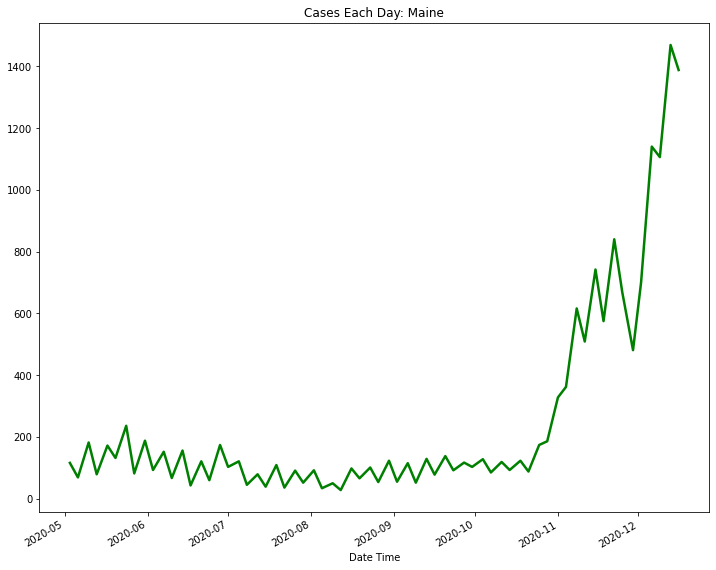

In [46]:
maine_covid_summary.set_index('Date Time')['Cases Each Day'].plot(figsize=(12, 10), title='Cases Each Day: Maine'
                                                                        ,linewidth=2.5, color='green')


<AxesSubplot:title={'center':'Deaths Each Day: Maine'}, xlabel='Date Time'>

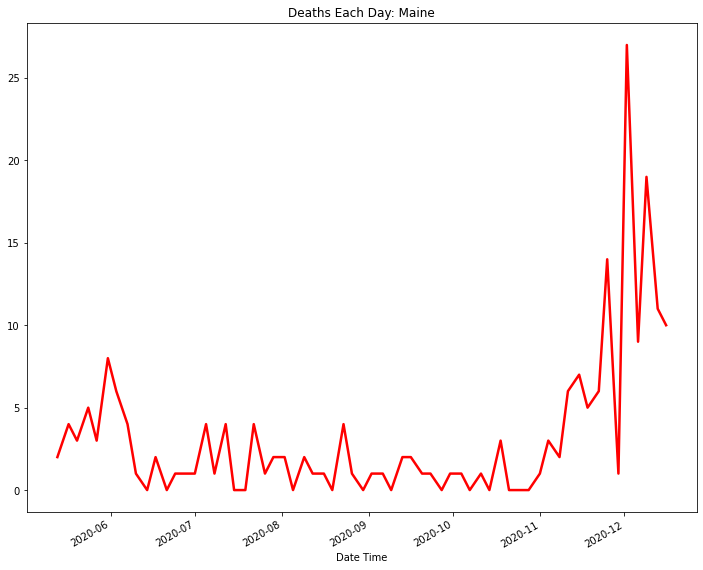

In [47]:
maine_covid_summary.set_index('Date Time')['Deaths Each Day'].plot(figsize=(12, 10), title='Deaths Each Day: Maine'
                                                                        ,linewidth=2.5, color='red')



<AxesSubplot:title={'center':'Hospitalizations Each Day: Maine'}, xlabel='Date Time'>

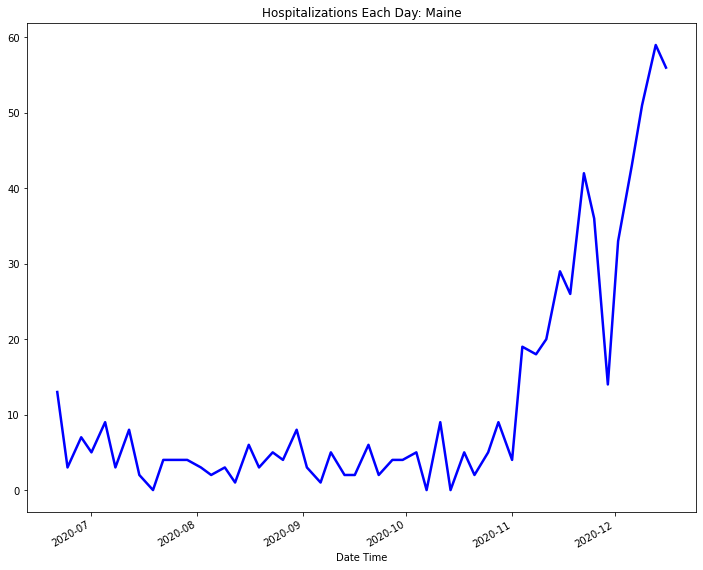

In [48]:
maine_covid_summary.set_index('Date Time')['Hosp Each Day'].plot(figsize=(12, 10), title='Hospitalizations Each Day: Maine'
                                                                        ,linewidth=2.5, color='blue')


